In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [55]:
myopic_df = pd.read_csv('myopia.csv')
myopic_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [56]:
X = myopic_df.drop('MYOPIC', axis=1).copy()
y = myopic_df['MYOPIC']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [57]:
myopic_df.shape

(618, 15)

In [58]:
myopic_df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [59]:
myopic_df.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [60]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(myopic_df)

In [61]:
X_scaled[0]


array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ,  2.57480672])

In [62]:
pca = PCA(n_components=2)
myopic_df_pca = pca.fit_transform(X_scaled)
pca.explained_variance_ratio_.sum()

0.34531909323377874

In [63]:
myopic_df_pca.shape

(618, 2)

In [64]:
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)

tsne_features = tsne.fit_transform(myopic_df_pca)

c:\Users\kzaho\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.000s...
[t-SNE] Computed neighbors for 618 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 0.508491
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.096977
[t-SNE] KL divergence after 2500 iterations: 0.311882


In [65]:
tsne_features.shape

(618, 3)

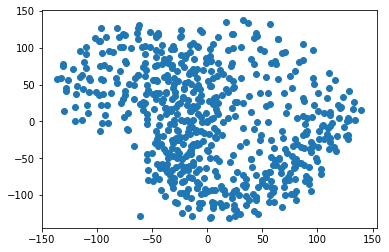

In [66]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])

In [67]:
#3.1  Create an elbow plot to identify the best number of clusters. Make sure to do the following:

# Use a for loop to determine the inertia for each k between 1 through 10.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopic_df_pca)
    inertia.append(km.inertia_)

    
# 3.2 If possible, determine where the elbow of the plot is, and at which value of k it appears.
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

c:\Users\kzaho\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,3201.107994
1,2,2045.823441
2,3,1303.928559
3,4,1058.954551
4,5,864.980725


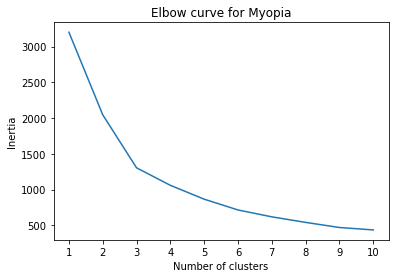

In [68]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()

In [69]:
len(pca.components_)

2

In [70]:
# Create a DataFrame from the PCA transformed data for K-Means modelling and plotting
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
pca_df = pd.DataFrame(myopic_df_pca, columns=columns)
pca_df['class']= km.labels_
pca_df.head()

,1,2,class
0,0.782223,0.899441,4
1,-0.618303,-1.586202,9
2,-0.986671,-0.653131,9
3,0.351302,0.944180,4
4,-0.402257,-2.791852,3


c:\Users\kzaho\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\kzaho\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


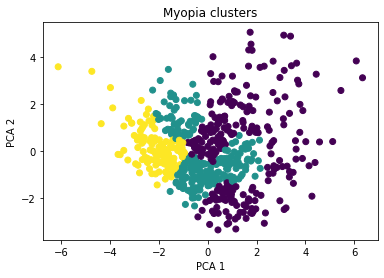

In [71]:
# Initialize the K-Means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

# Train the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)

# Add predicted clusters (labels) to DataFrame
pca_df['class'] = model.labels_
# Plot the Clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()